In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

from keras.utils import to_categorical

In [2]:
# Step 1: Gather a dataset
dataset_path = '/content/drive/MyDrive/dataset'  # Update with the actual path of the uploaded dataset

labels = [label for label in os.listdir(dataset_path) if label != '.ipynb_checkpoints']
num_classes = len(labels)
print(labels)


images = []
class_labels = []

for label_id, label in enumerate(labels):
    class_path = os.path.join(dataset_path, label)
    image_files = os.listdir(class_path)
    # print(image_files)

    for image_file in image_files:
        if not image_file.startswith('.ipynb_checkpoint'):  # Exclude .ipynb_checkpoint files
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (293, 192))  # Resize image to (293, 192)
            images.append(image)
            class_labels.append(label_id)





['Melasma', 'Eczema', 'acne cystic', 'Rosacea', 'acne pustular', 'Herpes', 'Lentigo', 'acne comedo']


In [ ]:
# Step 2: Preprocess the data
images = np.array(images)
class_labels = np.array(class_labels)
images = images.astype('float32') / 255.0
class_labels = to_categorical(class_labels, num_classes)

In [ ]:
# Step 3: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, class_labels, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Feature extraction using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(192, 293, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Step 5: Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Step 6: Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Step 7: Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Step 8: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 9: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

Epoch 1/20
18/18 [==============================] - 21s 709ms/step - loss: 0.5020 - accuracy: 0.8303 - val_loss: 1.1704 - val_accuracy: 0.7482
Epoch 2/20
18/18 [==============================] - 11s 594ms/step - loss: 0.3647 - accuracy: 0.8736 - val_loss: 0.9925 - val_accuracy: 0.6978
Epoch 3/20
18/18 [==============================] - 8s 434ms/step - loss: 0.3553 - accuracy: 0.8700 - val_loss: 1.2858 - val_accuracy: 0.6906
Epoch 4/20
18/18 [==============================] - 9s 523ms/step - loss: 0.3730 - accuracy: 0.8556 - val_loss: 1.0691 - val_accuracy: 0.7122
Epoch 5/20
18/18 [==============================] - 9s 492ms/step - loss: 0.3216 - accuracy: 0.8827 - val_loss: 1.1179 - val_accuracy: 0.7410
Epoch 6/20
18/18 [==============================] - 10s 484ms/step - loss: 0.2830 - accuracy: 0.9007 - val_loss: 1.1417 - val_accuracy: 0.6978
Epoch 7/20
18/18 [==============================] - 11s 609ms/step - loss: 0.3045 - accuracy: 0.8827 - val_loss: 1.4327 - val_accuracy: 0.7266
Ep

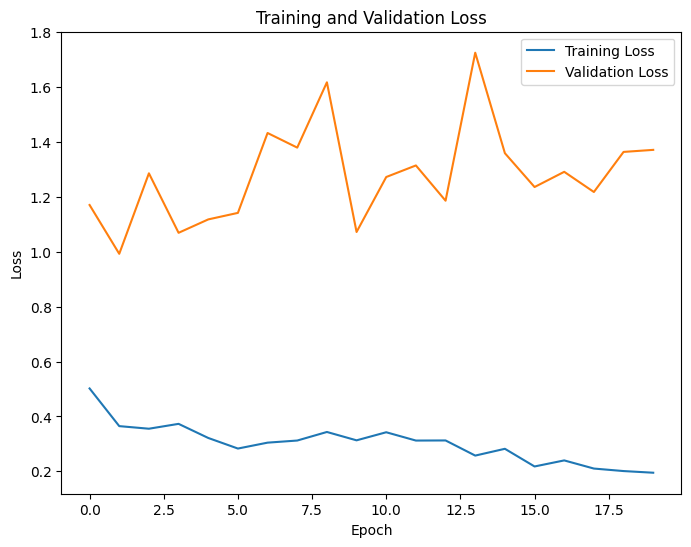

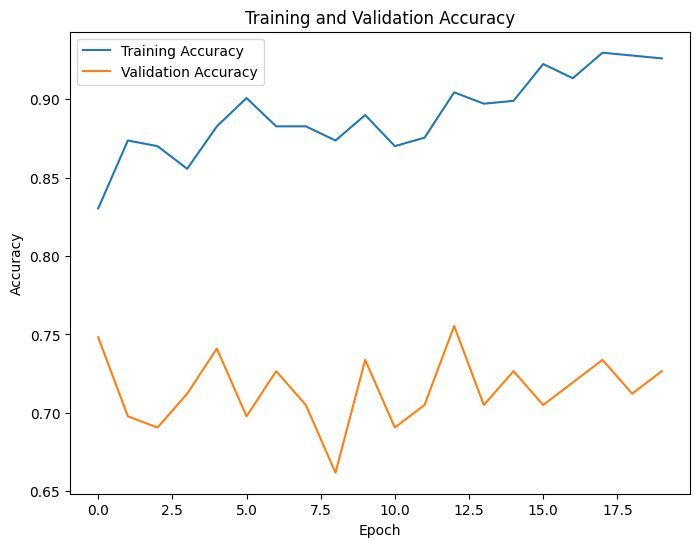

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

# Plot training loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 11: Unfreeze certain layers for fine-tuning
for layer in model.layers[15:]:
    layer.trainable = True

In [ ]:
# Step 12: Recompile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 13: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

Epoch 1/25
18/18 [==============================] - 11s 545ms/step - loss: 0.4345 - accuracy: 0.8321 - val_loss: 1.2210 - val_accuracy: 0.6978
Epoch 2/25
18/18 [==============================] - 8s 461ms/step - loss: 0.3063 - accuracy: 0.8953 - val_loss: 1.2402 - val_accuracy: 0.7266
Epoch 3/25
18/18 [==============================] - 10s 547ms/step - loss: 0.2554 - accuracy: 0.8971 - val_loss: 1.2244 - val_accuracy: 0.7554
Epoch 4/25
18/18 [==============================] - 10s 568ms/step - loss: 0.2211 - accuracy: 0.9278 - val_loss: 1.2791 - val_accuracy: 0.7194
Epoch 5/25
18/18 [==============================] - 9s 477ms/step - loss: 0.1650 - accuracy: 0.9440 - val_loss: 1.3409 - val_accuracy: 0.7338
Epoch 6/25
18/18 [==============================] - 11s 614ms/step - loss: 0.1927 - accuracy: 0.9314 - val_loss: 1.7090 - val_accuracy: 0.7050
Epoch 7/25
18/18 [==============================] - 10s 569ms/step - loss: 0.1469 - accuracy: 0.9422 - val_loss: 1.3700 - val_accuracy: 0.7122
E

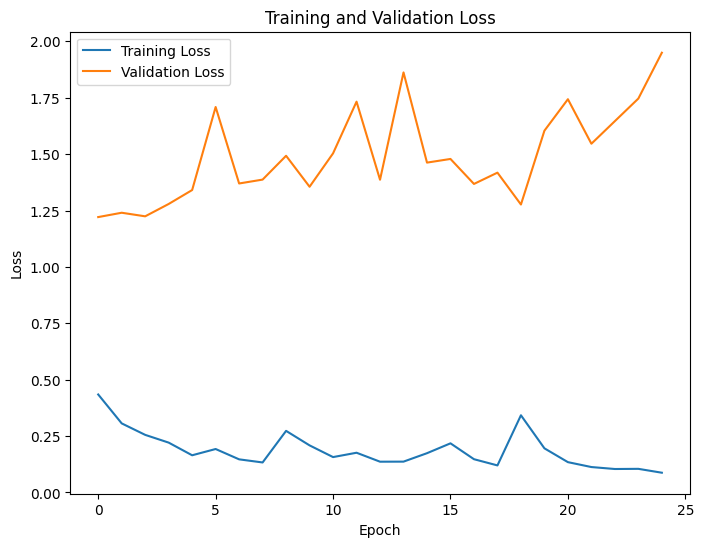

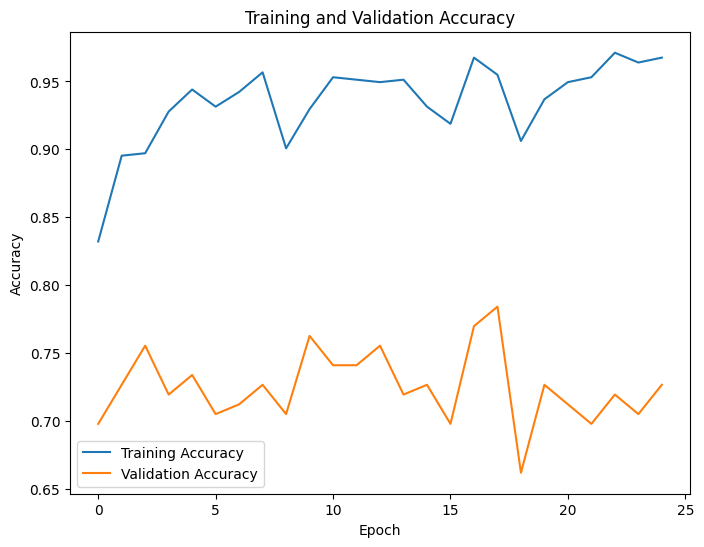

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25, validation_data=(X_test, y_test))

# Plot training loss and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 11: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

5/5 [==============================] - 1s 137ms/step - loss: 1.9497 - accuracy: 0.7266
Test Loss: 1.9496968984603882
Test Accuracy: 0.7266187071800232


In [ ]:
# Step 11: Save the model to a file
model.save('/content/drive/MyDrive/saved_models/finalmodel')

NameError: ignored

In [ ]:
# Step 12: Make predictions

from keras.models import load_model
model = load_model('/content/drive/MyDrive/saved_models/finalmodel.h5')


In [ ]:
new_image = cv2.imread('/content/drive/MyDrive/dataset/acne pustular/15.jpg')
new_image = cv2.resize(new_image, (293, 192))
new_image = np.expand_dims(new_image, axis=0)
new_image = new_image.astype('float32') / 255.0

prediction = model.predict(new_image)
predicted_label = np.argmax(prediction)
predicted_class = labels[predicted_label]

print("Predicted class:", predicted_class)

NameError: ignored